## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  93.007012   973.217804  0.604426  8.775015  595.701223
1  25.615827  1489.487000  0.641051  8.197883  955.174630
2  78.670220   848.821971  0.098993  3.906796  115.081005
3  70.807908   319.374024  0.574765  2.081403  196.742066
4  19.504234   422.242392  0.351595  4.423852  149.639301


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9389184	total: 57.4ms	remaining: 57.3s
1:	learn: 0.9289506	total: 58ms	remaining: 29s
2:	learn: 0.9199224	total: 58.6ms	remaining: 19.5s
3:	learn: 0.9099380	total: 59.2ms	remaining: 14.7s
4:	learn: 0.8970513	total: 59.7ms	remaining: 11.9s
5:	learn: 0.8882203	total: 60.4ms	remaining: 10s
6:	learn: 0.8774943	total: 61ms	remaining: 8.65s
7:	learn: 0.8673246	total: 61.5ms	remaining: 7.63s
8:	learn: 0.8551430	total: 62.1ms	remaining: 6.84s
9:	learn: 0.8422999	total: 62.8ms	remaining: 6.21s
10:	learn: 0.8326078	total: 63.4ms	remaining: 5.7s
11:	learn: 0.8196602	total: 64ms	remaining: 5.27s
12:	learn: 0.8094747	total: 64.5ms	remaining: 4.9s
13:	learn: 0.7982391	total: 64.9ms	remaining: 4.57s
14:	learn: 0.7867165	total: 65.4ms	remaining: 4.29s
15:	learn: 0.7790651	total: 67.1ms	remaining: 4.12s
16:	learn: 0.7694986	total: 67.6ms	remaining: 3.91s
17:	learn: 0.7603715	total: 68.1ms	remaining: 3.71s
18:	learn: 0.7528449	total: 68.7ms	remaining: 3.55s
19:	

131:	learn: 0.2201882	total: 117ms	remaining: 772ms
132:	learn: 0.2183271	total: 118ms	remaining: 770ms
133:	learn: 0.2164640	total: 118ms	remaining: 766ms
134:	learn: 0.2147224	total: 119ms	remaining: 762ms
135:	learn: 0.2128546	total: 119ms	remaining: 758ms
136:	learn: 0.2110388	total: 120ms	remaining: 754ms
137:	learn: 0.2095632	total: 120ms	remaining: 750ms
138:	learn: 0.2075680	total: 120ms	remaining: 746ms
139:	learn: 0.2058563	total: 121ms	remaining: 743ms
140:	learn: 0.2041650	total: 121ms	remaining: 739ms
141:	learn: 0.2020995	total: 122ms	remaining: 735ms
142:	learn: 0.2004794	total: 122ms	remaining: 731ms
143:	learn: 0.1987685	total: 123ms	remaining: 729ms
144:	learn: 0.1966223	total: 123ms	remaining: 725ms
145:	learn: 0.1943937	total: 123ms	remaining: 722ms
146:	learn: 0.1928666	total: 124ms	remaining: 719ms
147:	learn: 0.1908473	total: 124ms	remaining: 715ms
148:	learn: 0.1888423	total: 125ms	remaining: 712ms
149:	learn: 0.1872565	total: 125ms	remaining: 708ms
150:	learn: 

294:	learn: 0.0607260	total: 186ms	remaining: 444ms
295:	learn: 0.0603525	total: 186ms	remaining: 443ms
296:	learn: 0.0599757	total: 187ms	remaining: 442ms
297:	learn: 0.0595445	total: 187ms	remaining: 441ms
298:	learn: 0.0592121	total: 188ms	remaining: 440ms
299:	learn: 0.0588546	total: 188ms	remaining: 439ms
300:	learn: 0.0585012	total: 189ms	remaining: 439ms
301:	learn: 0.0581504	total: 189ms	remaining: 438ms
302:	learn: 0.0578110	total: 190ms	remaining: 436ms
303:	learn: 0.0574781	total: 190ms	remaining: 435ms
304:	learn: 0.0570313	total: 191ms	remaining: 434ms
305:	learn: 0.0566515	total: 191ms	remaining: 433ms
306:	learn: 0.0563226	total: 191ms	remaining: 432ms
307:	learn: 0.0559354	total: 192ms	remaining: 431ms
308:	learn: 0.0556824	total: 192ms	remaining: 430ms
309:	learn: 0.0553643	total: 193ms	remaining: 429ms
310:	learn: 0.0550456	total: 193ms	remaining: 428ms
311:	learn: 0.0547345	total: 194ms	remaining: 427ms
312:	learn: 0.0544787	total: 194ms	remaining: 426ms
313:	learn: 

552:	learn: 0.0194930	total: 300ms	remaining: 242ms
553:	learn: 0.0194544	total: 300ms	remaining: 242ms
554:	learn: 0.0194165	total: 301ms	remaining: 241ms
555:	learn: 0.0193183	total: 301ms	remaining: 240ms
556:	learn: 0.0192380	total: 302ms	remaining: 240ms
557:	learn: 0.0192012	total: 302ms	remaining: 239ms
558:	learn: 0.0191063	total: 302ms	remaining: 239ms
559:	learn: 0.0190766	total: 303ms	remaining: 238ms
560:	learn: 0.0189839	total: 303ms	remaining: 237ms
561:	learn: 0.0189548	total: 304ms	remaining: 237ms
562:	learn: 0.0189261	total: 304ms	remaining: 236ms
563:	learn: 0.0188457	total: 304ms	remaining: 235ms
564:	learn: 0.0188176	total: 305ms	remaining: 235ms
565:	learn: 0.0187385	total: 305ms	remaining: 234ms
566:	learn: 0.0186342	total: 306ms	remaining: 233ms
567:	learn: 0.0185516	total: 306ms	remaining: 233ms
568:	learn: 0.0185243	total: 306ms	remaining: 232ms
569:	learn: 0.0184225	total: 307ms	remaining: 231ms
570:	learn: 0.0183497	total: 307ms	remaining: 231ms
571:	learn: 

715:	learn: 0.0114999	total: 368ms	remaining: 146ms
716:	learn: 0.0114585	total: 368ms	remaining: 145ms
717:	learn: 0.0114119	total: 369ms	remaining: 145ms
718:	learn: 0.0113906	total: 369ms	remaining: 144ms
719:	learn: 0.0113499	total: 369ms	remaining: 144ms
720:	learn: 0.0113291	total: 370ms	remaining: 143ms
721:	learn: 0.0112890	total: 370ms	remaining: 143ms
722:	learn: 0.0112436	total: 371ms	remaining: 142ms
723:	learn: 0.0112233	total: 371ms	remaining: 142ms
724:	learn: 0.0111786	total: 372ms	remaining: 141ms
725:	learn: 0.0111397	total: 372ms	remaining: 140ms
726:	learn: 0.0110952	total: 372ms	remaining: 140ms
727:	learn: 0.0110889	total: 373ms	remaining: 139ms
728:	learn: 0.0110507	total: 373ms	remaining: 139ms
729:	learn: 0.0110073	total: 374ms	remaining: 138ms
730:	learn: 0.0109554	total: 374ms	remaining: 138ms
731:	learn: 0.0109181	total: 375ms	remaining: 137ms
732:	learn: 0.0108754	total: 375ms	remaining: 137ms
733:	learn: 0.0108390	total: 376ms	remaining: 136ms
734:	learn: 

976:	learn: 0.0057126	total: 481ms	remaining: 11.3ms
977:	learn: 0.0057066	total: 482ms	remaining: 10.8ms
978:	learn: 0.0056876	total: 482ms	remaining: 10.3ms
979:	learn: 0.0056678	total: 483ms	remaining: 9.85ms
980:	learn: 0.0056484	total: 483ms	remaining: 9.36ms
981:	learn: 0.0056359	total: 484ms	remaining: 8.87ms
982:	learn: 0.0056135	total: 484ms	remaining: 8.37ms
983:	learn: 0.0055943	total: 485ms	remaining: 7.88ms
984:	learn: 0.0055821	total: 485ms	remaining: 7.38ms
985:	learn: 0.0055627	total: 485ms	remaining: 6.89ms
986:	learn: 0.0055549	total: 486ms	remaining: 6.4ms
987:	learn: 0.0055427	total: 486ms	remaining: 5.9ms
988:	learn: 0.0055350	total: 486ms	remaining: 5.41ms
989:	learn: 0.0055276	total: 487ms	remaining: 4.92ms
990:	learn: 0.0055124	total: 487ms	remaining: 4.43ms
991:	learn: 0.0055004	total: 488ms	remaining: 3.93ms
992:	learn: 0.0054904	total: 488ms	remaining: 3.44ms
993:	learn: 0.0054873	total: 488ms	remaining: 2.95ms
994:	learn: 0.0054842	total: 489ms	remaining: 2.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


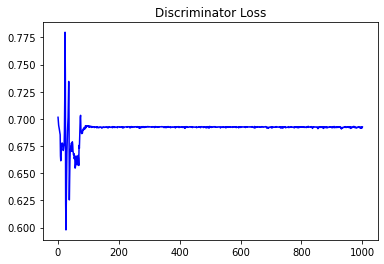

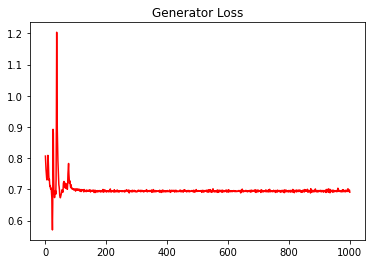

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.007825065051245835


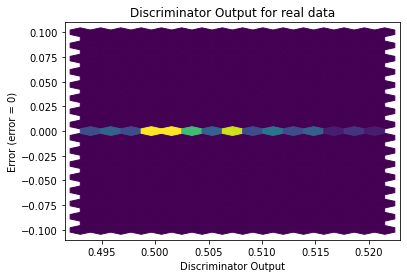

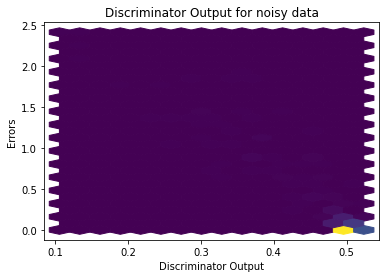

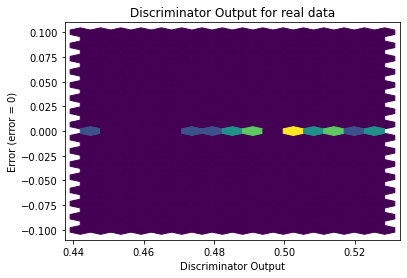

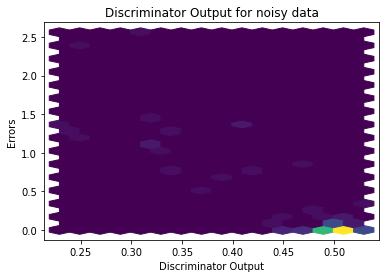

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7169]], requires_grad=True)
